# Task 2 Movie Rating Prediction Using Linear Regression
Build a predictive model to forecast movie ratings with Linear Regression and visualize the results. Plot a histogram of actual ratings, a scatter plot of actual vs. predicted ratings, and the top 10 features influencing ratings based on their coefficients.

Import necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Load the IMDb Movies India dataset

In [30]:
file_path = 'IMDb Movies India.csv'
movies_data = pd.read_csv(file_path, encoding='latin1')
movies_data = movies_data.sample(1500, random_state=42)

Select relevant features and target

In [31]:
selected_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

Preprocess the data and selecting unique categories

In [32]:
for feature in selected_features:
    top_categories = movies_data[feature].value_counts().nlargest(10).index
    movies_data[feature] = movies_data[feature].apply(lambda x: x if x in top_categories else 'Other')

Define X for features and y for target

In [33]:
movies_data = pd.get_dummies(movies_data[selected_features + [target]], columns=selected_features)
X = movies_data.drop(target, axis=1)
y = movies_data[target]

Split data into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1)).flatten()

Initialize and train the Linear Regression model

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train_imputed, y_train_imputed)

LinearRegression()

Make predictions using predict()

In [36]:
y_pred = linear_model.predict(X_test_imputed)

Evaluate model performance using Mean Squared Error and R-squared

In [37]:
mse = mean_squared_error(y_test_imputed, y_pred)
r2 = r2_score(y_test_imputed, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.04500205078125
R^2 Score: -0.1086477961977228


 Visualize actual vs predicted ratings

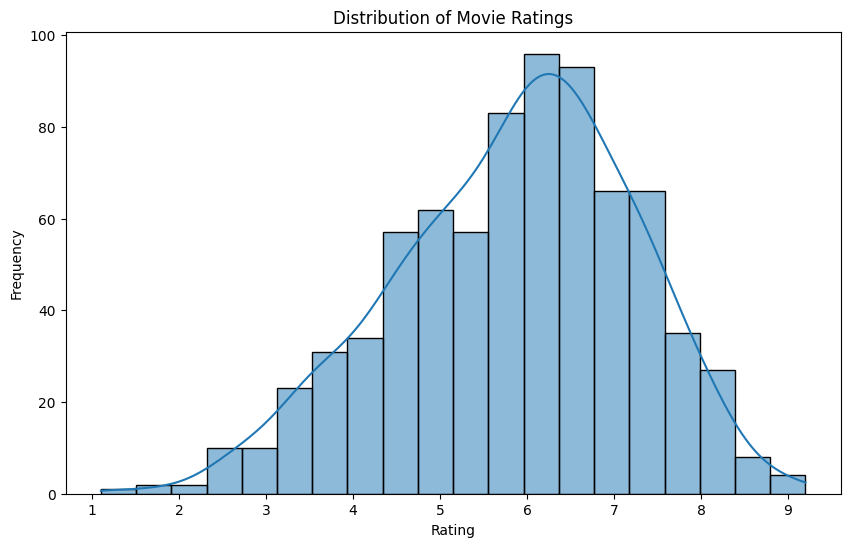

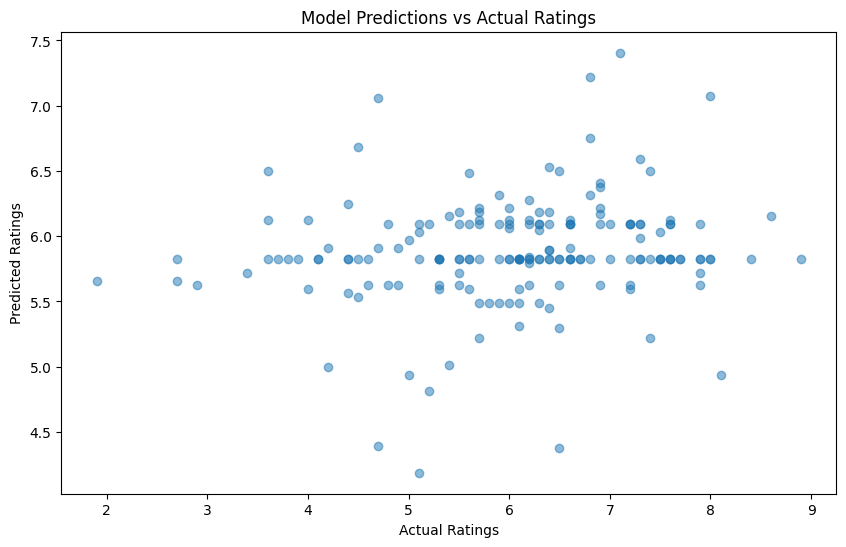

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Model Predictions vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


Feature Importance of Linear Model

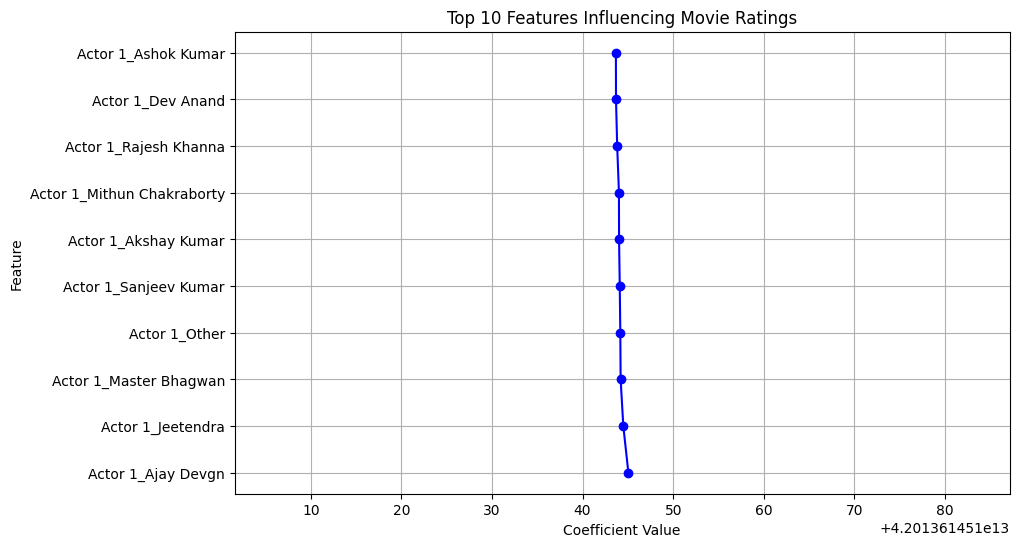

In [39]:
feature_importances = pd.Series(linear_model.coef_, index=X.columns)
top_features = feature_importances.abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.plot(top_features.values, top_features.index, marker='o', linestyle='-', color='blue')
plt.title('Top 10 Features Influencing Movie Ratings')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()